# United States Adidas Cohort Analysis

This is my cohort analysis on a [United States Adidas transaction/sales dataset](https://www.kaggle.com/datasets/ahmedabbas757/dataset). This project identifies retailer (customer) retention, churn rate and tracks the net revenue retention by analyzing the number of customers who continue to buy products and the income they earn over time. This project also calculates the Customer Lifetime Value (CLTV), a metric used to estimate the total revenue a customer will generate throughout their relationship with a business

Analyzing data using cohort analysis is an effective method to gain insights into how customer behavior evolves over time. This technique involves categorizing customers into cohorts based on shared characteristics (in this case, acquisition date) and then comparing their behavior using specific metrics. In this project, the metrics we measured are:
1. Retention Rate: The retention rate measures the percentage of users from the initial cohort who remain active after a specific period (e.g., 1 month, 3 months, 1 year). High retention rates indicate a successful product or service that keeps users engaged.
2. Churn Rate: This is the opposite of retention rate and refers to the percentage of users who stop using the product or service within a given timeframe. A low churn rate is desirable as it signifies customer satisfaction and loyalty.
3. Net Revenue Retention: This refers to the total revenue generated from sales minus any returns, discounts, or allowances. Tracking net revenue by cohort allows you to see how different customer groups contribute to your overall revenue stream over time.
4. Customer Lifetime Value (CLTV): CLTV estimates the total revenue a customer is expected to generate throughout their relationship with your business. Analyzing CLTV by cohort helps to understand the long-term value of different customer segments. 

In [528]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np
import re

In [529]:
df = pd.read_csv('Adidas Retail Sales.csv')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


## Data Preprocessing

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


- ### Change Columns Name

In [531]:
df.rename(columns={'Price per Unit': 'Price per Unit($)',
            'Total Sales': 'Total Sales($)',
            'Operating Profit':'Operating Profit($)'},inplace=True)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Retailer             9641 non-null   object
 1   Retailer ID          9641 non-null   int64 
 2   Invoice Date         9641 non-null   object
 3   Region               9641 non-null   object
 4   State                9641 non-null   object
 5   City                 9641 non-null   object
 6   Product              9641 non-null   object
 7   Price per Unit($)    9639 non-null   object
 8   Units Sold           9641 non-null   object
 9   Total Sales($)       9641 non-null   object
 10  Operating Profit($)  9641 non-null   object
 11  Sales Method         9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


- ### Change Datatype

In [533]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Price per Unit($)'] = pd.to_numeric((df['Price per Unit($)'].str.replace('$','')))
df['Operating Profit($)'] = pd.to_numeric(df['Operating Profit($)'].str.replace('$','').str.replace(',',''))
df['Total Sales($)'] = pd.to_numeric(df['Total Sales($)'].str.replace(',',''))
df['Units Sold'] = pd.to_numeric(df['Units Sold'].str.replace(',',''))

In [534]:
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103.0,218,2245,1257,Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103.0,163,1679,806,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000,3150,Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625,3881,Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125,3206,Outlet


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Retailer             9641 non-null   object        
 1   Retailer ID          9641 non-null   int64         
 2   Invoice Date         9641 non-null   datetime64[ns]
 3   Region               9641 non-null   object        
 4   State                9641 non-null   object        
 5   City                 9641 non-null   object        
 6   Product              9641 non-null   object        
 7   Price per Unit($)    9639 non-null   float64       
 8   Units Sold           9641 non-null   int64         
 9   Total Sales($)       9641 non-null   int64         
 10  Operating Profit($)  9641 non-null   int64         
 11  Sales Method         9641 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 904.0+ KB


- ### Handle Missing Values
Based on the information below, the "Price per Unit" column has many missing values.

In [536]:
df[df["Price per Unit($)"].isnull()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Sales Method
6725,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,NaN,850,51000,15300,Outlet
7882,Sports Direct,1197831,2020-07-29,South,Texas,Houston,Men's Apparel,NaN,500,20000,6000,Outlet


In [537]:
df['Price per Unit($)'] = df['Price per Unit($)'].fillna(df['Total Sales($)']/df['Units Sold'])

In [538]:
df.iloc[[6725,7882]]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Sales Method
6725,Foot Locker,1185732,2020-01-29,Northeast,New York,New York,Men's Apparel,60.0,850,51000,15300,Outlet
7882,Sports Direct,1197831,2020-07-29,South,Texas,Houston,Men's Apparel,40.0,500,20000,6000,Outlet


- ### Handle Noisy Data

In [539]:
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103.0,218,2245,1257,Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103.0,163,1679,806,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000,3150,Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625,3881,Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125,3206,Outlet


In [540]:
# Show the number of unique values for "Retailer" column
df.Retailer.nunique()

6

In [541]:
# Show the retailer IDs for each distinct retailer
df.groupby('Retailer', as_index=False)['Retailer ID'].agg(set)

,Retailer,Retailer ID
0,Amazon,{1185732}
1,Foot Locker,"{1128299, 1185732, 1197831}"
2,Kohl's,"{1189833, 1128299, 1185732, 1197831}"
3,Sports Direct,"{1128299, 1185732, 1197831}"
4,Walmart,"{1128299, 1185732, 1197831}"
5,West Gear,"{1128299, 1185732, 1197831}"


In [542]:
df.groupby('Retailer ID', as_index=False)['Retailer'].agg(set)

,Retailer ID,Retailer
0,1128299,"{Sports Direct, Walmart, West Gear, Kohl's, Fo..."
1,1185732,"{Kohl's, Sports Direct, Walmart, Amazon, West ..."
2,1189833,{Kohl's}
3,1197831,"{Sports Direct, Walmart, West Gear, Kohl's, Fo..."


- ### Feature Engineering

The "Handle Noisy Data" section reveals inconsistencies in retailer IDs. A single retailer appears multiple times with different IDs, and conversely, some IDs may be associated with multiple retailers. For example, Walmart retailer has IDs 1128299, 1185732, and 1197831. To address this, we'll use the "Retailer" column as the unique identifier (primary key) for consistency.

In this section, we will remove unnecessary columns and create new columns.

In [543]:
#Remove unnecessary columns
df.drop(['Retailer ID', "Region", 'State', 'City', 'Product', 'Sales Method'],axis=1,inplace=True)
df

,Retailer,Invoice Date,Price per Unit($),Units Sold,Total Sales($),Operating Profit($)
0,Walmart,2021-06-17,103.0,218,2245,1257
1,West Gear,2021-07-16,103.0,163,1679,806
2,Sports Direct,2021-08-25,10.0,700,7000,3150
3,Sports Direct,2021-08-27,15.0,575,8625,3881
4,Sports Direct,2021-08-21,15.0,475,7125,3206
...,...,...,...,...,...,...
9636,Amazon,2021-11-18,65.0,150,9750,2438
9637,Amazon,2021-10-22,65.0,150,9750,2438
9638,Amazon,2021-10-22,75.0,150,11250,2813
9639,West Gear,2021-04-10,65.0,150,9750,2925


In [544]:
# Create new columns
df['Total Sales($)'] = df['Price per Unit($)'] * df['Units Sold']
df['Adidas Revenue'] = df['Total Sales($)'] - df['Operating Profit($)']
df

,Retailer,Invoice Date,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Adidas Revenue
0,Walmart,2021-06-17,103.0,218,22454.0,1257,21197.0
1,West Gear,2021-07-16,103.0,163,16789.0,806,15983.0
2,Sports Direct,2021-08-25,10.0,700,7000.0,3150,3850.0
3,Sports Direct,2021-08-27,15.0,575,8625.0,3881,4744.0
4,Sports Direct,2021-08-21,15.0,475,7125.0,3206,3919.0
...,...,...,...,...,...,...,...
9636,Amazon,2021-11-18,65.0,150,9750.0,2438,7312.0
9637,Amazon,2021-10-22,65.0,150,9750.0,2438,7312.0
9638,Amazon,2021-10-22,75.0,150,11250.0,2813,8437.0
9639,West Gear,2021-04-10,65.0,150,9750.0,2925,6825.0


## Create Cohort

- ### Acquisition Date

In [545]:
df['Acquisiton Date'] = df.groupby('Retailer')['Invoice Date'].transform(min)
df['Acquisiton Date'] = pd.to_datetime(df['Acquisiton Date'],format='%Y-%m')
df

,Retailer,Invoice Date,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Adidas Revenue,Acquisiton Date
0,Walmart,2021-06-17,103.0,218,22454.0,1257,21197.0,2020-04-17
1,West Gear,2021-07-16,103.0,163,16789.0,806,15983.0,2020-01-02
2,Sports Direct,2021-08-25,10.0,700,7000.0,3150,3850.0,2020-05-24
3,Sports Direct,2021-08-27,15.0,575,8625.0,3881,4744.0,2020-05-24
4,Sports Direct,2021-08-21,15.0,475,7125.0,3206,3919.0,2020-05-24
...,...,...,...,...,...,...,...,...
9636,Amazon,2021-11-18,65.0,150,9750.0,2438,7312.0,2021-01-13
9637,Amazon,2021-10-22,65.0,150,9750.0,2438,7312.0,2021-01-13
9638,Amazon,2021-10-22,75.0,150,11250.0,2813,8437.0,2021-01-13
9639,West Gear,2021-04-10,65.0,150,9750.0,2925,6825.0,2020-01-02


- ### Period (Month)

In [546]:
def get_number(x: str):
    list_number = re.findall('\d', x)
    temp = 0
    for i in list_number:
        temp = (temp * 10) + int(i)
    return temp

In [547]:
df['Period (Month)'] = (df['Invoice Date'].dt.to_period('M') - df['Acquisiton Date'].dt.to_period('M'))
df['Period (Month)'] = df['Period (Month)'].apply(lambda x: get_number(str(x)))
df

,Retailer,Invoice Date,Price per Unit($),Units Sold,Total Sales($),Operating Profit($),Adidas Revenue,Acquisiton Date,Period (Month)
0,Walmart,2021-06-17,103.0,218,22454.0,1257,21197.0,2020-04-17,14
1,West Gear,2021-07-16,103.0,163,16789.0,806,15983.0,2020-01-02,18
2,Sports Direct,2021-08-25,10.0,700,7000.0,3150,3850.0,2020-05-24,15
3,Sports Direct,2021-08-27,15.0,575,8625.0,3881,4744.0,2020-05-24,15
4,Sports Direct,2021-08-21,15.0,475,7125.0,3206,3919.0,2020-05-24,15
...,...,...,...,...,...,...,...,...,...
9636,Amazon,2021-11-18,65.0,150,9750.0,2438,7312.0,2021-01-13,10
9637,Amazon,2021-10-22,65.0,150,9750.0,2438,7312.0,2021-01-13,9
9638,Amazon,2021-10-22,75.0,150,11250.0,2813,8437.0,2021-01-13,9
9639,West Gear,2021-04-10,65.0,150,9750.0,2925,6825.0,2020-01-02,15


In [548]:
df['Acquisiton Date'] = df['Acquisiton Date'].dt.strftime('%Y-%m')
headers = df['Acquisiton Date'].unique()
headers

array(['2020-04', '2020-01', '2020-05', '2021-01', '2020-12'],
      dtype=object)

## Retailer Retention Analysis

In [549]:
retailer_cohort_df = pd.pivot_table(df,values='Retailer',index='Acquisiton Date', columns='Period (Month)',aggfunc=pd.Series.nunique)
retailer_cohort_df.fillna(0,inplace=True)
retailer_cohort_df

Period (Month),0,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Acquisiton Date,,,,,,,,,,,,,,,,,,,,,
2020-01,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2020-04,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2020-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2020-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [550]:
retailer_cohort_size = retailer_cohort_df.iloc[:,0]
retailer_cohort_size

Acquisiton Date
2020-01    2.0
2020-04    1.0
2020-05    1.0
2020-12    1.0
2021-01    1.0
Name: 0, dtype: float64

In [551]:
retailer_cohort_df = retailer_cohort_df.divide(retailer_cohort_size,axis=0)
retailer_cohort_df

Period (Month),0,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Acquisiton Date,,,,,,,,,,,,,,,,,,,,,
2020-01,1.0,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.5,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-04,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2020-05,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2020-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


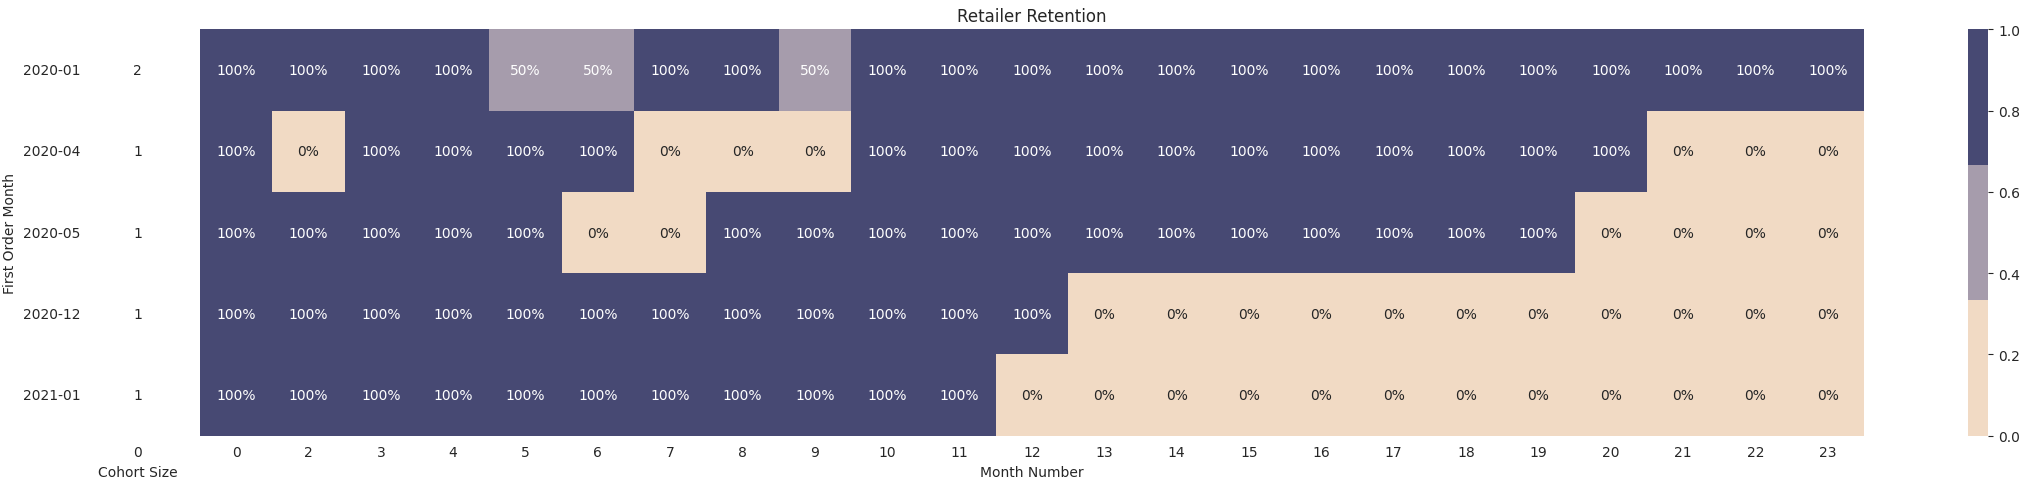

In [552]:
with sns.axes_style('white'):

    color_map = [ "#f1dac4", '#a69cac','#474973']

    fig, ax = plt.subplots(1,2,figsize=(23,5),sharey=True,gridspec_kw={'width_ratios':(1,22)})
    sns.heatmap(retailer_cohort_df,annot=True,ax=ax[1],fmt='.0%',cmap=color_map)
    ax[1].set_title('Retailer Retention')
    ax[1].set_xlabel('Month Number')
    ax[1].set_ylabel('')

    retailer_cohort_size = pd.DataFrame(retailer_cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(retailer_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month')
    ax[0].tick_params(axis='y', rotation=0)

    plt.subplots_adjust(bottom=0.2)
    fig.tight_layout()

## Net Revenue Retention Analysis

In [553]:
revenue_cohort_df = pd.pivot_table(df,values='Adidas Revenue',index='Acquisiton Date', columns='Period (Month)',aggfunc=sum)
revenue_cohort_df.fillna(0,inplace=True)
revenue_cohort_df

Period (Month),0,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Acquisiton Date,,,,,,,,,,,,,,,,,,,,,
2020-01,3349819.0,1887995.0,1325085.0,907903.0,854920.0,1257447.0,802673.0,808485.0,110032.0,889697.0,...,1416530.0,1462557.0,2225740.0,3624306.0,4171192.0,2948128.0,1401935.0,1709448.0,2719208.0,4101511.0
2020-04,1419277.0,0.0,87360.0,838534.0,625936.0,517201.0,0.0,0.0,0.0,27737.0,...,530474.0,831471.0,800844.0,525490.0,427009.0,460903.0,265962.0,0.0,0.0,0.0
2020-05,188354.0,330453.0,243770.0,221285.0,387383.0,0.0,0.0,688592.0,627559.0,950737.0,...,1041815.0,1882740.0,2725510.0,1861122.0,1072100.0,1484370.0,0.0,0.0,0.0,0.0
2020-12,887884.0,970140.0,958572.0,1298160.0,1796722.0,547311.0,614254.0,596789.0,456999.0,426261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01,803480.0,388155.0,367314.0,592974.0,700268.0,795545.0,711805.0,538937.0,592422.0,828417.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [554]:
revenue_cohort_size = revenue_cohort_df.iloc[:,0]
revenue_cohort_size

Acquisiton Date
2020-01    3349819.0
2020-04    1419277.0
2020-05     188354.0
2020-12     887884.0
2021-01     803480.0
Name: 0, dtype: float64

In [555]:
revenue_cohort_df = revenue_cohort_df.divide(revenue_cohort_size,axis=0)
revenue_cohort_df

Period (Month),0,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Acquisiton Date,,,,,,,,,,,,,,,,,,,,,
2020-01,1.0,0.563611,0.395569,0.271030,0.255214,0.375378,0.239617,0.241352,0.032847,0.265596,...,0.422868,0.436608,0.664436,1.081941,1.245199,0.880086,0.418511,0.510311,0.811748,1.224398
2020-04,1.0,0.000000,0.061552,0.590818,0.441025,0.364412,0.000000,0.000000,0.000000,0.019543,...,0.373764,0.585841,0.564262,0.370252,0.300864,0.324745,0.187393,0.000000,0.000000,0.000000
2020-05,1.0,1.754425,1.294212,1.174836,2.056675,0.000000,0.000000,3.655840,3.331806,5.047607,...,5.531154,9.995753,14.470147,9.880979,5.691942,7.880746,0.000000,0.000000,0.000000,0.000000
2020-12,1.0,1.092643,1.079614,1.462083,2.023600,0.616422,0.691818,0.672147,0.514706,0.480086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01,1.0,0.483092,0.457154,0.738007,0.871544,0.990124,0.885903,0.670753,0.737320,1.031036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


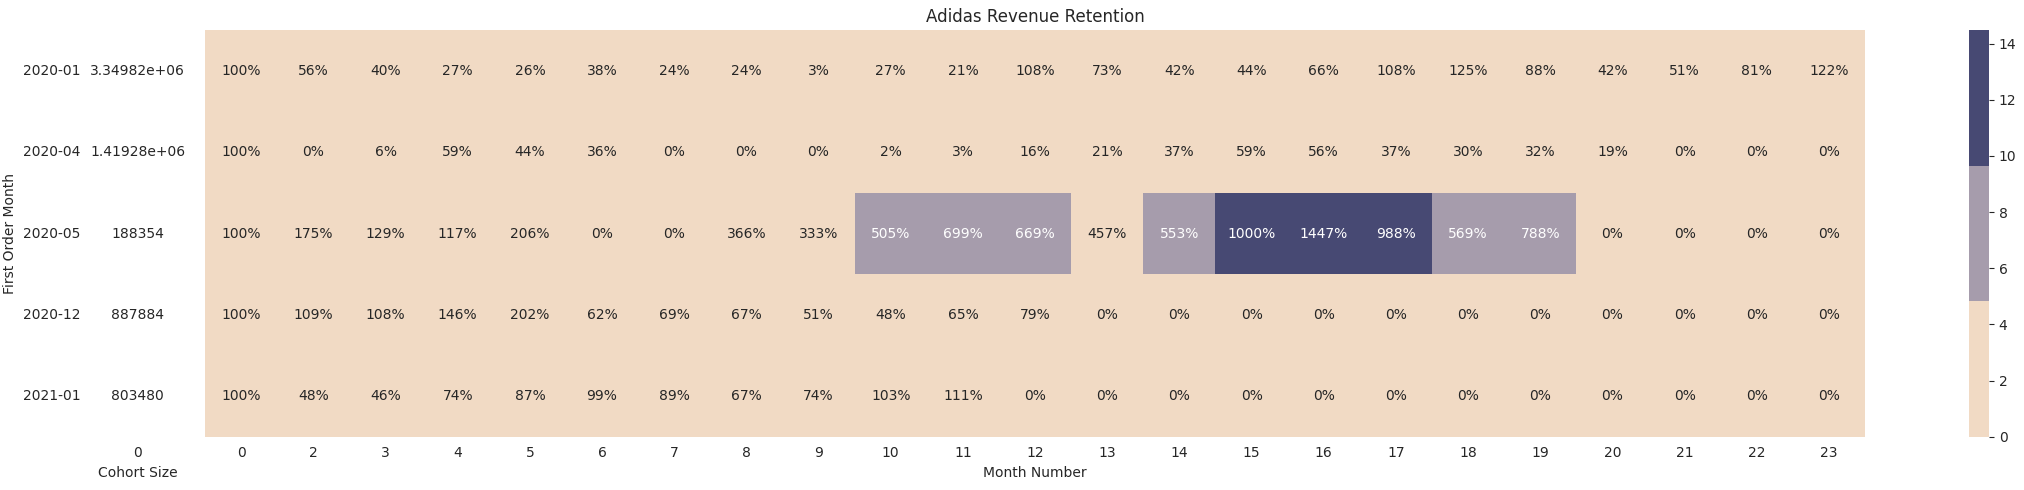

In [556]:
with sns.axes_style('white'):

    color_map = [ "#f1dac4", '#a69cac','#474973']

    fig, ax = plt.subplots(1,2,figsize=(23,5),sharey=True,gridspec_kw={'width_ratios':(1,22)})
    sns.heatmap(revenue_cohort_df,annot=True,ax=ax[1],fmt='.0%',cmap=color_map)
    ax[1].set_title('Adidas Revenue Retention')
    ax[1].set_xlabel('Month Number')
    ax[1].set_ylabel('')

    revenue_cohort_size = pd.DataFrame(revenue_cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(revenue_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month')
    ax[0].tick_params(axis='y', rotation=0)

    # plt.subplots_adjust(bottom=0.2)
    fig.tight_layout()